## 00 packages

In [1]:
##########################################################################################
##########################################################################################

import networkx as nx

from shapely.geometry import Point,Polygon

import math

import random

##########################################################################################
##########################################################################################

import numpy as np

import pandas as pd

##########################################################################################
##########################################################################################

import matplotlib

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

##########################################################################################
##########################################################################################

from itertools import combinations, permutations

from itertools import islice

##########################################################################################
##########################################################################################

import copy


### 01 parameters

In [2]:
##########################################################################################
##########################################################################################

alpha=1

batch_interval=1

##########################################################################################
##########################################################################################

speed=10000/60

##########################################################################################
##########################################################################################

speed

166.66666666666666

### 01 Comparision of the latest compeletion time

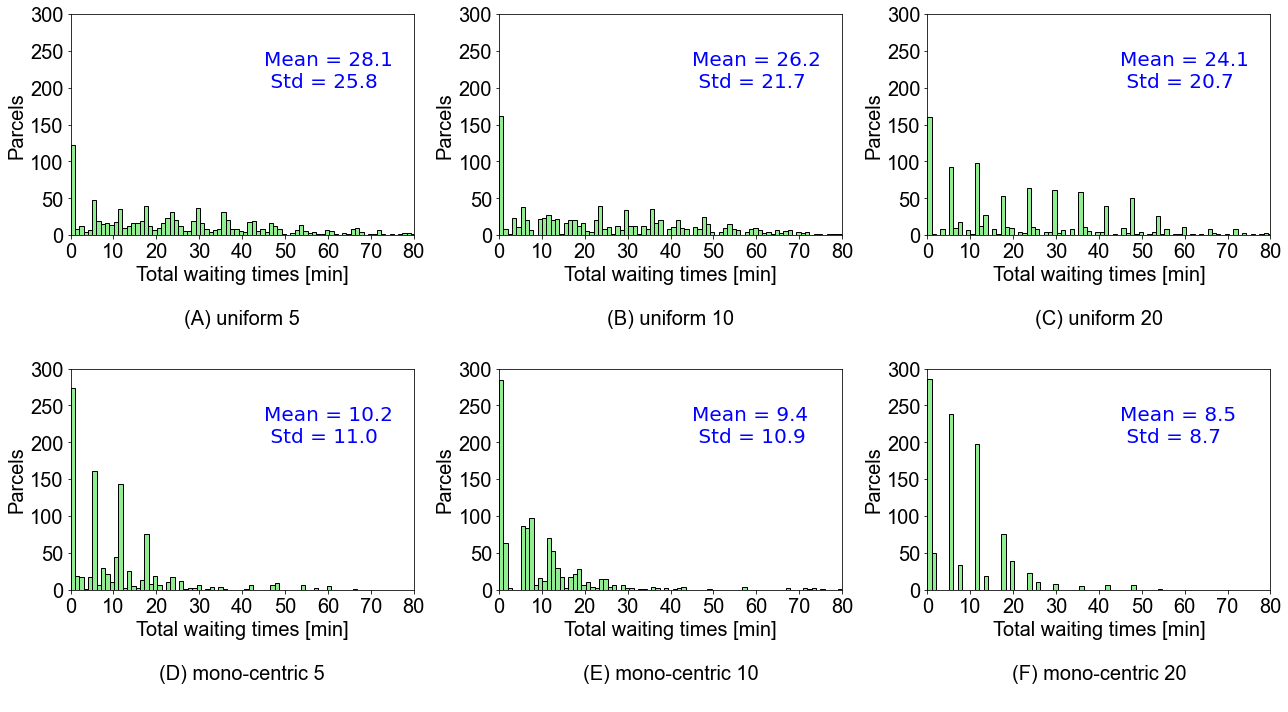

In [3]:
##########################################################################################
##########################################################################################

lambda_values = [5,10,20]

patterns=['uniform','centralized']#'centralized','uniform'

##########################################################################################
##########################################################################################

save_paths=["./03result/03Multi-hop/"]

##########################################################################################
##########################################################################################

def calculate_distance(schedules):
    
    tt_dis=0
    
    for schedule in schedules.values():
        
        trajectory=list(schedule.values())

        for i in range(1, len(trajectory),1):
                
            tt_dis+=Point(trajectory[i-1]).distance(Point(trajectory[i]))
                
    return tt_dis/1000.0

##########################################################################################
##########################################################################################

def flatten_list(lst):
    flattened = []
    for item in lst:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

##########################################################################################
##########################################################################################

arrays=list()

##########################################################################################
##########################################################################################

idx=-1

##########################################################################################
##########################################################################################

font_title = {'family' : 'Arial','weight' : 'normal','size': 40}

font_label = {'family' : 'Arial','weight' : 'normal','size': 20}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 20}

figure, axs = plt.subplots(2,3,figsize=(18,10))

for i in range(2):
    
    for j in range(3):

        labels = axs[i][j].get_xticklabels() + axs[i][j].get_yticklabels()

        [label.set_fontsize(20) for label in labels]

        [label.set_fontname('Arial') for label in labels]
    
##########################################################################################
##########################################################################################

labels=['(A)','(B)','(C)','(D)','(E)','(F)']


k=0

for pattern in patterns:
    
    idx+=1
    
    jdx=-1

    for lambda_value in lambda_values:
        
        jdx+=1
        
        ##########################################################################################
        ##########################################################################################
        
        instance_name=pattern+" "+str(lambda_value)
      
        ##########################################################################################
        ##########################################################################################

        save_path=save_paths[0]

        save_path=save_path+pattern+'_'+str(lambda_value)

        ##########################################################################################
        ##########################################################################################

        parcel_schedules=np.load(save_path+"/parcel_schedules_"+str(alpha)+"_"+str(batch_interval)+'.npy',allow_pickle=True).item()

        ##########################################################################################
        ##########################################################################################
        
        locker_waiting_times=list()
        
        for parcel_id,schedule in parcel_schedules.items():
            
            schedule=list(schedule.values())
            
            if len(schedule)==1:
                
                locker_waiting_time=0.0
                
            else:
                
                locker_waiting_time=0.0
                
                for i in range(1,len(schedule),1):
                    
                    locker_waiting_time+=schedule[i]['pick_up'][1]-schedule[i-1]['drop_off'][1]
                    
                    if schedule[i]['pick_up'][1]-schedule[i-1]['drop_off'][1]<0:
                        
                        print(pattern,lambda_value)
                    
            locker_waiting_times.append(locker_waiting_time)
            
        ##########################################################################################
        ##########################################################################################
        
        if idx==0:
        
            binBoundaries = np.linspace(0,200,200)
            
            
        else:
            
             binBoundaries = np.linspace(0,80,80)
        
        axs[idx][jdx].hist(locker_waiting_times, bins=binBoundaries, edgecolor='black',facecolor='lightgreen')
        
        if 'centralized' in instance_name:
            
            instance_name='mono-centric'+" "+str(lambda_value)
        
        axs[idx][jdx].set_xlabel('Total waiting times [min]\n\n'+labels[k]+' '+instance_name+'\n',font_label)
        
        k+=1
        
        axs[idx][jdx].set_ylabel('Parcels',font_label)
        
        ##########################################################################################
        ##########################################################################################
        
        if idx==0:
        
            axs[idx][jdx].set_ylim([0,300])

            axs[idx][jdx].set_xlim([0,80])
            
            axs[idx][jdx].text(45, 200, 'Mean = '+str(round(np.array(locker_waiting_times).mean(),1))+'\n Std = '+str(round(np.array(locker_waiting_times).std(),1)), fontsize = 20, color = 'blue')
            
        elif idx==1:
            
            axs[idx][jdx].set_ylim([0,300])

            axs[idx][jdx].set_xlim([0,80])
            
            axs[idx][jdx].text(45, 200, 'Mean = '+str(round(np.array(locker_waiting_times).mean(),1))+'\n Std = '+str(round(np.array(locker_waiting_times).std(),1)), fontsize = 20, color = 'blue')
        
                    
                    
plt.tight_layout()

current_fig = plt.gcf() 

current_fig.savefig('./07figures/07parcel_waiting_time.eps', format='eps', dpi=1000, bbox_inches = 'tight')

plt.show()
